In [88]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from conformation import Conformation
from utils.energy_utils import Parameters
from cotranscriptional import NascentChain
from design import Design
from plot import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [92]:
def plot_nascent_traces(nascent_mdl, n_confs_to_plot=10):
    '''Input:
    nascent_mdl: nascent chain mdl, defined in cotranscriptional.py
    n_confs_to_plot: number of top-scored confs to plot
    '''
    
    min_y = np.min([np.min(m.x[:,:n_confs_to_plot]) for m in nascent_mdl.models])
    max_y = np.max([np.max(m.x[:,:n_confs_to_plot]) for m in nascent_mdl.models])
    for i, mdl in enumerate(nascent_mdl.models):
        subplot(2,5,i+1)
        draw_traces(mdl, n_confs = n_confs_to_plot, boltz_weight=True)

        xlim([-1,cotransc_mdl.N+1])
        ylim([min_y, max_y])
        xlabel('seqpos')
    tight_layout()

In [10]:
twin_hairpin = '((.))((.))'

Scoring includes GNM elastic energy


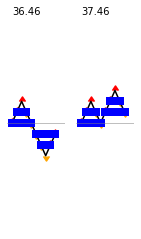

In [11]:
conf = Conformation(secstruct=twin_hairpin)
conf.run()
draw_conformations(conf)

Found 64 sequences to test


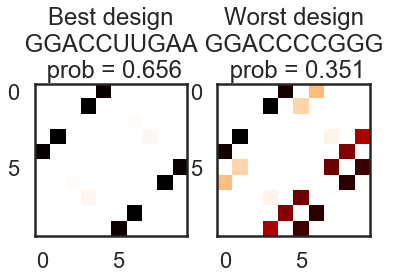

In [18]:
design_mdl = Design(secstruct=twin_hairpin, pattern='GGACCNNNNN', params = Parameters(gnm=False))
design_mdl.run()

In [100]:
twin_hp_sequence = 'GGACCUUGAA'

cotransc_mdl = NascentChain(sequence=twin_hp_sequence, params=Parameters(gnm=False))
cotransc_mdl.run()

getting conformations for each step of nascent chain ...
G
.
GG
..
GGA
...
GGAC
.(.)
GGACC
((.))
GGACCU
((.)).
GGACCUU
((.))..
GGACCUUG
((.))...
GGACCUUGA
((.)).(.)
GGACCUUGAA
((.))((.))


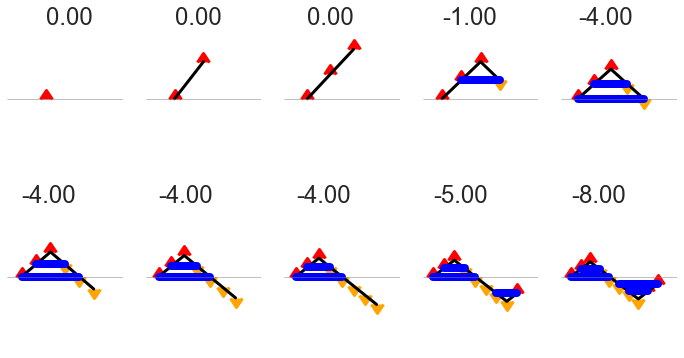

In [69]:
#plot MFE at each step:

figure(figsize=(12,6))
for i, mdl in enumerate(cotransc_mdl.models):
    subplot(2,5,i+1)
    draw_conformations(mdl, n_confs = 1)

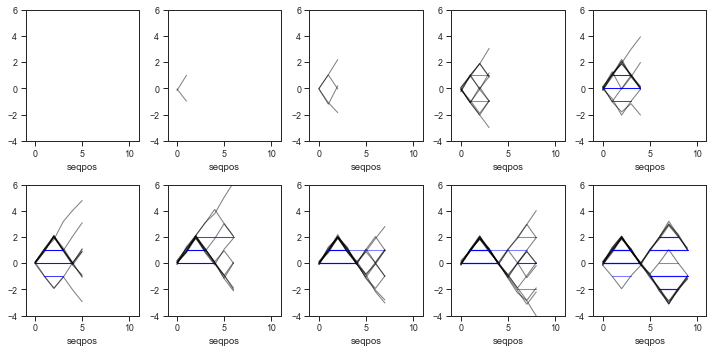

In [95]:
figure(figsize=(10,5))

plot_nascent_traces(cotransc_mdl)

getting conformations for each step of nascent chain ...
G
.
GG
..
GGA
...
GGAC
.(.)
GGACC
((.))
GGACCA
((.)).
GGACCAU
((.))..
GGACCAUU
((.))(.)
GGACCAUUA
((.))(.).
GGACCAUUAU
((.))((.))


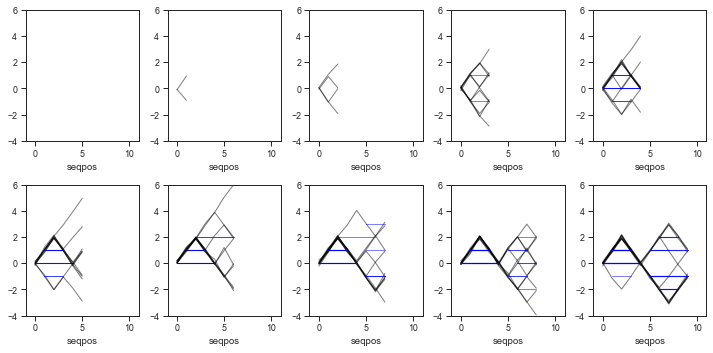

In [101]:
# now try with another seq from model?

cotransc_mdl = NascentChain(sequence=design_mdl.sequences[10], params=Parameters(gnm=False))
cotransc_mdl.run()

figure(figsize=(10,5))
plot_nascent_traces(cotransc_mdl)

In [ ]:
# things to look for:

# how to analyze kinetic traps?
# minimize off-pathway kinetic traps in design scheme?